# **Import Libraries**

In [ ]:
import numpy as np #linear algebra operations
import pandas as pd #data preparation
import plotly.express as px #data visualization
from textblob import TextBlob #sentiment analysis

# **Import data**

In [ ]:
df = pd.read_csv('/netflix_titles.csv')

# Rows and columns in the file

In [ ]:
df.shape

(8807, 12)

# **Dataset content**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Counts of ratings available**

In [ ]:
x = df.groupby(['rating']).size().reset_index(name = 'counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


# **Content rating piechart**

In [ ]:
pieChart = px.pie(x, values = 'counts', names = 'rating', title = 'Distribution of Ratings')
pieChart.show()

# **Top 5 Directors on Netflix**

In [ ]:
df['director'] = df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
dlist = pd.DataFrame()
print(dlist)

Empty DataFrame
Columns: []
Index: []


In [ ]:
dlist = df['director'].str.split(',', expand=True).stack()
print(dlist)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [ ]:
dlist = dlist.to_frame()
print(dlist)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
dlist.columns = ['Director']
print(dlist)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors = dlist.groupby(['Director']).size().reset_index(name = 'Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116          Ã–mer Faruk Sorak            2
5117      Ã“skar ThÃ³r Axelsson            1
5118               Ã‡agan Irmak            1
5119               Ã€lex Pastor            2
5120             Åženol SÃ¶nmez            2

[5121 rows x 2 columns]


In [ ]:
directors = directors[directors.Director != 'Director not specified']
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116          Ã–mer Faruk Sorak            2
5117      Ã“skar ThÃ³r Axelsson            1
5118               Ã‡agan Irmak            1
5119               Ã€lex Pastor            2
5120             Åženol SÃ¶nmez            2

[5120 rows x 2 columns]


In [ ]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

                 Director  Total Count
4021        Rajiv Chilaka           22
4068         RaÃºl Campos           18
261             Jan Suter           18
3236         Marcus Raboy           16
4652          Suhas Kadav           16
...                   ...          ...
2331  Ivan Andrew Payawal            1
610    Songyos Sugmakanan            1
611          Sonia Dauger            1
612        Sophie Sartain            1
2336           Ivona Juka            1

[5120 rows x 2 columns]


In [ ]:
topdirectors = directors.head()
print(topdirectors)

           Director  Total Count
4021  Rajiv Chilaka           22
4068   RaÃºl Campos           18
261       Jan Suter           18
3236   Marcus Raboy           16
4652    Suhas Kadav           16


In [ ]:
topdirectors = topdirectors.sort_values(by=['Total Count'])
barChart = px.bar(topdirectors, x='Total Count', y = 'Director', title = 'Top 5 Directors on Netflix')
barChart.show()

# **Genre Popularity Trends**

In [ ]:
genre_df = df[['release_year', 'listed_in']]
genre_df

,release_year,listed_in
0,2020,Documentaries
1,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,2021,"Docuseries, Reality TV"
4,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,2007,"Cult Movies, Dramas, Thrillers"
8803,2018,"Kids' TV, Korean TV Shows, TV Comedies"
8804,2009,"Comedies, Horror Movies"
8805,2006,"Children & Family Movies, Comedies"


# **Drop rows with missing values**

In [ ]:
genre_df = genre_df.dropna()
genre_df

,release_year,listed_in
0,2020,Documentaries
1,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,2021,"Docuseries, Reality TV"
4,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,2007,"Cult Movies, Dramas, Thrillers"
8803,2018,"Kids' TV, Korean TV Shows, TV Comedies"
8804,2009,"Comedies, Horror Movies"
8805,2006,"Children & Family Movies, Comedies"


# **Rename Columns**

In [ ]:
genre_df = genre_df.rename(columns={'release_year':'Year','listed_in':'Genre'})
genre_df

,Year,Genre
0,2020,Documentaries
1,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,2021,"Docuseries, Reality TV"
4,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,2007,"Cult Movies, Dramas, Thrillers"
8803,2018,"Kids' TV, Korean TV Shows, TV Comedies"
8804,2009,"Comedies, Horror Movies"
8805,2006,"Children & Family Movies, Comedies"


# **Filter years >= 2010**

In [ ]:
genre_df = genre_df[genre_df['Year']>=2010]
genre_df

,Year,Genre
0,2020,Documentaries
1,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,2021,"Docuseries, Reality TV"
4,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8798,2014,"Comedies, Dramas, International Movies"
8800,2012,"International TV Shows, Romantic TV Shows, TV ..."
8801,2015,"Dramas, International Movies, Thrillers"
8803,2018,"Kids' TV, Korean TV Shows, TV Comedies"


# **Split genres**

In [ ]:
genre_expanded = genre_df['Genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Genre')
genre_expanded

,Genre
0,Documentaries
1,International TV Shows
1,TV Dramas
1,TV Mysteries
2,Crime TV Shows
...,...
8803,Korean TV Shows
8803,TV Comedies
8806,Dramas
8806,International Movies


# **Map year values to expand genres**

In [ ]:
genre_expanded['Year'] = genre_expanded.index.map(genre_df['Year'].__getitem__)
print(genre_expanded)

                       Genre  Year
0              Documentaries  2020
1     International TV Shows  2021
1                  TV Dramas  2021
1               TV Mysteries  2021
2             Crime TV Shows  2021
...                      ...   ...
8803         Korean TV Shows  2018
8803             TV Comedies  2018
8806                  Dramas  2015
8806    International Movies  2015
8806        Music & Musicals  2015

[16322 rows x 2 columns]


# **Group by year and genre**

In [ ]:
top_genres_per_year = genre_expanded.groupby(['Year', 'Genre']).size().reset_index(name='Count')
top_genres_per_year.head()

,Year,Genre,Count
0,2010,Anime Features,2
1,2010,Children & Family Movies,2
2,2010,Comedies,15
3,2010,Crime TV Shows,1
4,2010,Cult Movies,1


# **Top 5 genres per year**


Top 5 genres in 2010:
    Year                  Genre  Count
10  2010   International Movies     73
34  2010                 Dramas     48
30  2010               Comedies     37
25  2010     Action & Adventure     29
16  2010        Romantic Movies     27


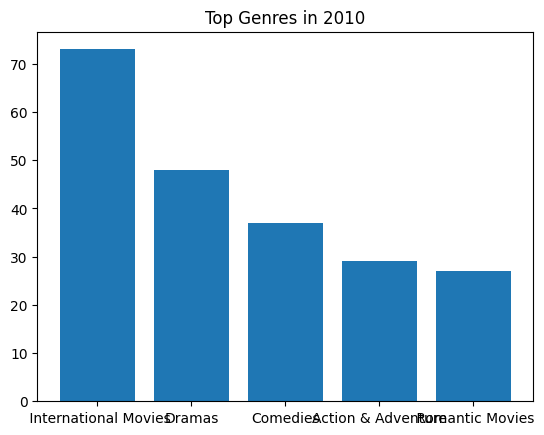


Top 5 genres in 2011:
    Year                  Genre  Count
53  2011   International Movies     53
75  2011               Comedies     33
49  2011                 Dramas     30
79  2011                 Dramas     30
70  2011     Action & Adventure     26


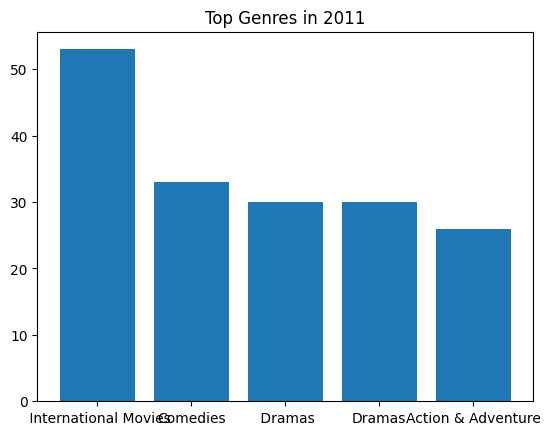


Top 5 genres in 2012:
     Year                   Genre  Count
98   2012    International Movies     77
120  2012                Comedies     48
124  2012                  Dramas     42
116  2012      Action & Adventure     29
127  2012  International TV Shows     27


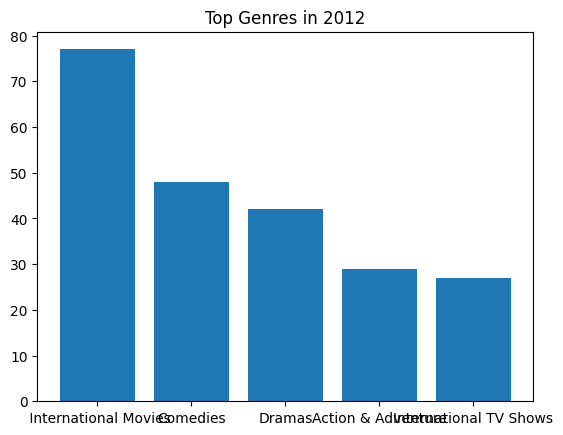


Top 5 genres in 2013:
     Year                     Genre  Count
145  2013      International Movies    118
175  2013                    Dramas     59
170  2013                  Comedies     47
169  2013  Children & Family Movies     34
144  2013        Independent Movies     30


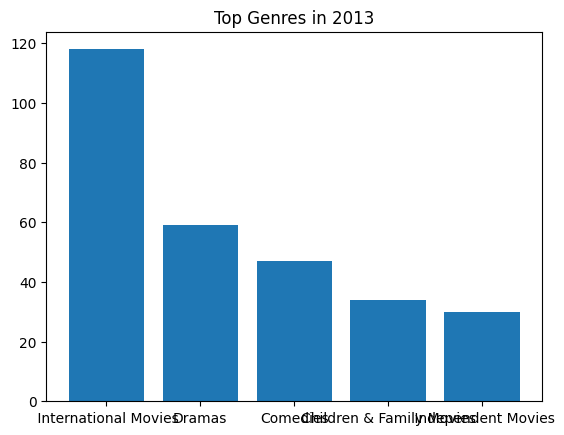


Top 5 genres in 2014:
     Year                  Genre  Count
197  2014   International Movies    116
226  2014                 Dramas     68
222  2014               Comedies     60
217  2014              Thrillers     38
193  2014                 Dramas     36


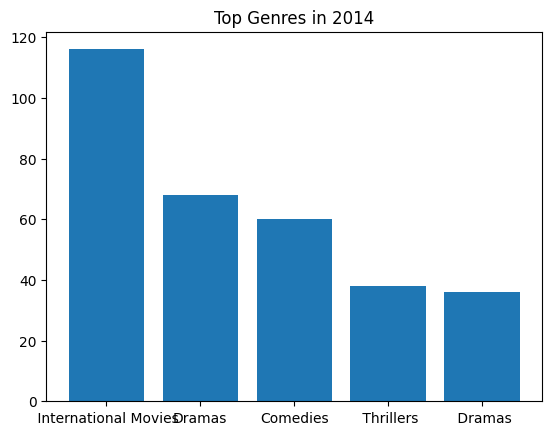


Top 5 genres in 2015:
     Year                  Genre  Count
250  2015   International Movies    203
284  2015                 Dramas    130
280  2015               Comedies     76
282  2015          Documentaries     66
249  2015     Independent Movies     65


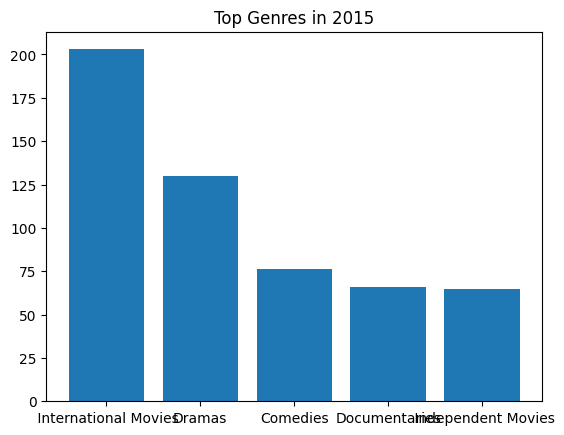


Top 5 genres in 2016:
     Year                  Genre  Count
311  2016   International Movies    288
344  2016                 Dramas    189
342  2016          Documentaries    132
340  2016               Comedies    116
310  2016     Independent Movies    100


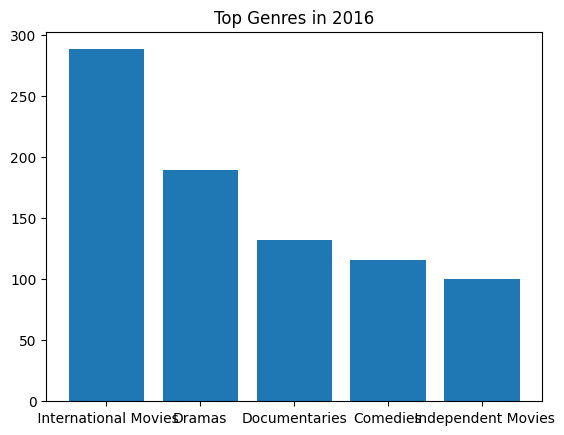


Top 5 genres in 2017:
     Year                  Genre  Count
372  2017   International Movies    316
406  2017                 Dramas    197
404  2017          Documentaries    164
402  2017               Comedies    133
371  2017     Independent Movies    110


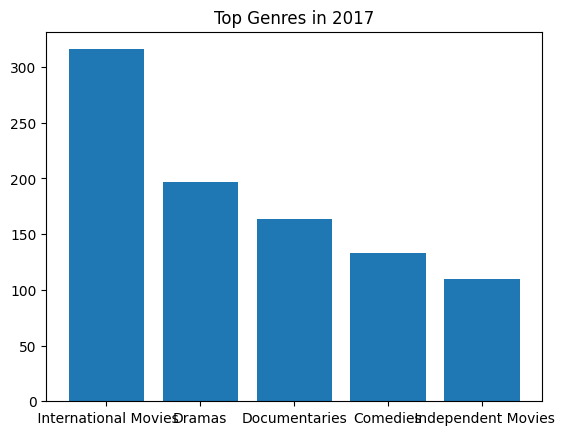


Top 5 genres in 2018:
     Year                  Genre  Count
437  2018   International Movies    328
473  2018                 Dramas    216
468  2018               Comedies    138
436  2018     Independent Movies    126
471  2018          Documentaries    117


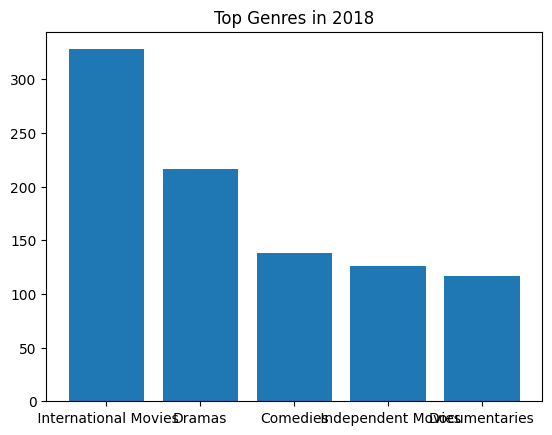


Top 5 genres in 2019:
     Year                   Genre  Count
503  2019    International Movies    258
537  2019                  Dramas    166
520  2019               TV Dramas    118
533  2019                Comedies    118
541  2019  International TV Shows    109


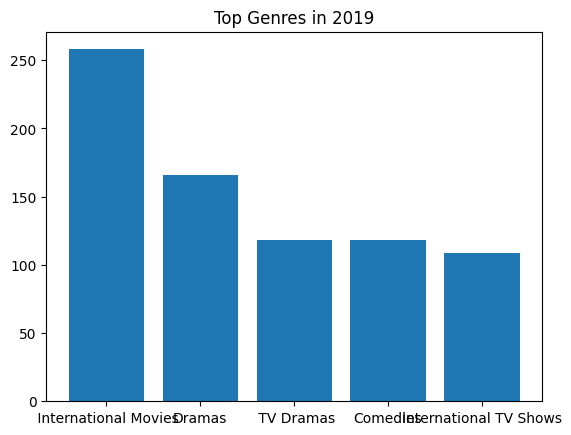


Top 5 genres in 2020:
     Year                    Genre  Count
566  2020     International Movies    225
599  2020                   Dramas    136
603  2020   International TV Shows    115
582  2020                TV Dramas    114
567  2020   International TV Shows     99


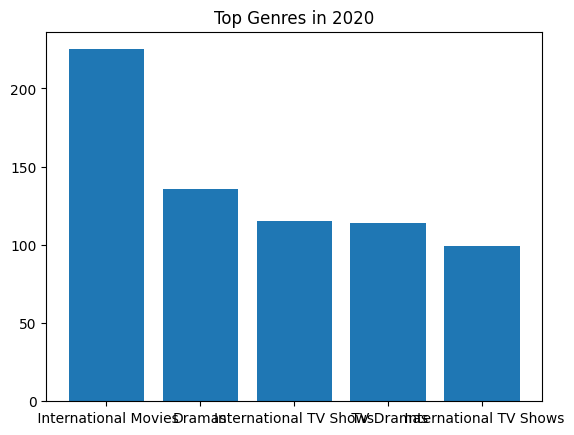


Top 5 genres in 2021:
     Year                    Genre  Count
627  2021     International Movies    134
661  2021   International TV Shows     88
642  2021                TV Dramas     77
628  2021   International TV Shows     61
658  2021                   Dramas     57


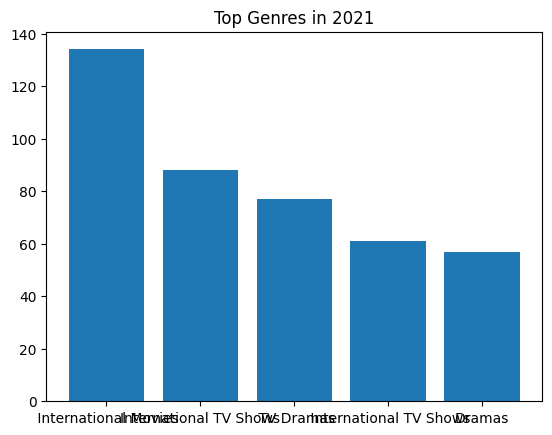

In [ ]:
import matplotlib.pyplot as plt
for year in sorted(top_genres_per_year['Year'].unique()):
    temp = top_genres_per_year[top_genres_per_year['Year'] == year].nlargest(5, 'Count')
    print(f"\nTop 5 genres in {year}:")
    print(temp)
    plt.bar(temp['Genre'], temp['Count'])
    plt.title(f"Top Genres in {year}")
    plt.show()

# **Country wise Content distribution**

In [ ]:
#drop rows and columns with missing value
country_type = df[['country', 'type']].dropna()
print(country_type)

                                                country     type
0                                         United States    Movie
1                                          South Africa  TV Show
4                                                 India  TV Show
7     United States, Ghana, Burkina Faso, United Kin...    Movie
8                                        United Kingdom  TV Show
...                                                 ...      ...
8801                       United Arab Emirates, Jordan    Movie
8802                                      United States    Movie
8804                                      United States    Movie
8805                                      United States    Movie
8806                                              India    Movie

[7976 rows x 2 columns]


In [ ]:
#Map type values to expanded countries
country_type_expanded = country_type['country'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Country')
country_type_expanded = country_type_expanded.reset_index(drop=False)
country_type_expanded['Type'] = country_type_expanded['index'].map(country_type['type'].__getitem__)
print(country_type_expanded.head())


   index        Country     Type
0      0  United States    Movie
1      1   South Africa  TV Show
2      4          India  TV Show
3      7  United States    Movie
4      7          Ghana    Movie


In [ ]:
#group by country and type, count occurrences
country_counts = country_type_expanded.groupby(['Country', 'Type']).size().reset_index(name='Count')
print(country_counts.head())

        Country     Type  Count
0                  Movie      6
1                TV Show      1
2   Afghanistan    Movie      1
3       Albania    Movie      1
4       Algeria    Movie      3


In [ ]:
#bar chart
bar_chart = px.bar(country_counts, x='Country', y='Count', color='Type', title='Country-wise Netflix Content by Type')
bar_chart.show()

# **Missing Value Analysis**

In [ ]:
missing_info = df.isnull().mean().reset_index()
missing_info.columns = ['Column','Missing Proportion']
px.bar(missing_info, x='Column', y='Missing Proportion', title='Missing Values per Column')

# **Titles released per year**

In [ ]:
yearly_titles = df.groupby(['release_year', 'type']).size().reset_index(name='Title Count')
px.bar(yearly_titles, x='release_year', y='Title Count', color='type', title='Titles Released per Year')

# **Duration Analysis**

In [ ]:
movies = df[df['type'] == 'Movie']
movies['duration_num'] = movies['duration'].str.extract(r'(\d+)').astype(float)
movies_year_avg = movies.groupby('release_year')['duration_num'].mean().reset_index(name='Avg Duration')
print(movies_year_avg.head(10))

   release_year  Avg Duration
0          1942     35.000000
1          1943     62.666667
2          1944     52.000000
3          1945     51.333333
4          1946     58.000000
5          1947     42.000000
6          1954    118.000000
7          1955    100.333333
8          1956    101.000000
9          1958     98.666667


/tmp/ipython-input-3131329502.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
shows = df[df['type'] == 'TV Show']
shows['seasons_num'] = shows['duration'].str.extract(r'(\d+)').astype(float)
shows_year_avg = shows.groupby('release_year')['seasons_num'].mean().reset_index(name='Avg Seasons')
print(shows_year_avg.head(10))

   release_year  Avg Seasons
0          1925          1.0
1          1945          1.0
2          1946          1.0
3          1963          4.0
4          1967          8.0
5          1972          1.0
6          1974          4.0
7          1977         10.0
8          1979          1.0
9          1981          1.0


/tmp/ipython-input-679137110.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.line(movies_year_avg, x='release_year', y='Avg Duration', title='Average Movie Duration by Year')
fig.show()
fig2 = px.line(shows_year_avg, x='release_year', y='Avg Seasons', title='Average TV Show Seasons by Year')
fig2.show()

# **Rating Category Evolution**

In [ ]:
ratings_year = df.groupby(['release_year', 'rating']).size().reset_index(name='Count')
fig = px.bar(ratings_year, x='release_year', y='Count', color='rating', title='Netflix Ratings Over Years')
fig.show()

# **Release Timelines**

In [ ]:
df['month_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
monthly_titles = df.groupby(['year_added', 'month_added']).size().reset_index(name='Added Count')
fig = px.line(monthly_titles, x='month_added', y='Added Count', color='year_added', title='Monthly New Titles Added')
fig.show()

/tmp/ipython-input-1387210583.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-1387210583.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

